# Experiment with 9 Nodes from Cooja

In [1]:
#"Decomment for install"
#!pip install kmeans
#!pip install seaborn

In [1]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import random
random.seed(6666)

In [2]:

dataList=coojaJsonImporter("../cooja-9nodes/traces")
data=[]
cases=[
      "BH1",
        "BH2",
    "normal"
      ]
BlackHole=[-1,4,5+8]
for nodeList in dataList:
    data.append(createNodes(nodeList))


Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json


In [3]:

def ReplaceMissingPackets(node):
    #print(node.pkts["pkt"])
    print("Executed")
    maxP=-1

    for el in node.pkts["seq"]:
        if(el>maxP): maxP=int(el)
    #print(maxP)
    pkt=[None]*(maxP+1)
    for i in range(len(node.pkts["seq"])):
        index=int(node.pkts["seq"][i])
        #print(index)
        pkt[index]=node.pkts["rtt"][i]
        #pkt[)]=node.pkts["pkt"][i]
    return pkt


        #if(el)
    
#pprint(getPercentageMissingPackets(data[0][3].pkts,100))
#pprint(findMissingPackets(data[0][3]))


In [11]:
pings=getPings(data)
#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net

d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    #"25%":  [],
    #"50%":[],
    #"75%":[],
   #"min":[],
   #"max":[],
   "hop":[],
   #"missing":[],
   "packet loss":[],
   "outliers":[],
   "node":[]
}
count=[]
labels=[]
var=[]
#window=100
#stats=pd.DataFrame(columns=columns)
rows=[count,labels]
for i in range(len(data)):
    window=pings[i]
    
    for j in range(len(data[i])):
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #d["25%"].append(nodeWindow.describe()["25%"])
            #d["50%"].append(nodeWindow.describe()["50%"])
            #d["75%"].append(nodeWindow.describe()["75%"])
            #d["min"].append(nodeWindow.describe()["min"])
            #d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
           
            d["outliers"].append(getOutliers(node)["rtt"].count())
            missing=window-nodeWindow.count()
            d["node"].append(data[i][j].ip)
            d["packet loss"].append(getPercentageMissingPackets(node,window))
            
            
            
stats=pd.DataFrame(d)            

stats
correction=[]
correction2=[] #for 3 cluster 0:normal net 1:bh net 2:bh

#Creating simple array to correct unsupervised learning
#NB as it is unsupervised could happen that the correction are inverted
for i in range(len(d["label"])):
    el=d["label"][i]
    if el=="normal":
        correction.append(1)
        correction2.append(1)
        
    else:
        #print(el=="BH2" and i==BlackHole[2])
        correction.append(0)
        if ((el=="BH1" and i==BlackHole[1]) or
            (el=="BH2" and i==BlackHole[2])):
            
            correction2.append(2)
        else:
            correction2.append(0)
        

correction=np.array(correction)
correction2=np.array(correction2)

stats

,label,count,std,mean,var,hop,packet loss,outliers,node
0,BH1,98,1403.775442,1868.816327,1.970585e+06,1,1.010101,5,aaaa::212:7404:4:404:
1,BH1,99,1812.662114,2139.282828,3.285744e+06,1,0.000000,6,aaaa::212:7403:3:303:
2,BH1,91,1873.889033,3916.604396,3.511460e+06,2,8.080808,6,aaaa::212:740b:b:b0b:
3,BH1,97,1308.893667,1815.742268,1.713203e+06,1,2.020202,6,aaaa::212:7402:2:202:
4,BH1,25,2220.932875,4667.000000,4.932543e+06,3,74.747475,2,aaaa::212:7409:9:909:
5,BH1,20,1692.746764,4806.350000,2.865392e+06,3,79.797980,0,aaaa::212:740a:a:a0a:
6,BH1,92,1942.511168,3667.793478,3.773350e+06,2,7.070707,6,aaaa::212:7405:5:505:
7,BH1,13,1707.433281,5039.076923,2.915328e+06,3,86.868687,0,aaaa::212:7408:8:808:
8,BH1,88,1836.716617,3821.000000,3.373528e+06,2,11.111111,4,aaaa::212:7407:7:707:
9,BH2,95,1254.483776,1812.136842,1.573730e+06,1,2.061856,5,aaaa::212:7404:4:404:


In [12]:

data=stats.drop([
    "label","var","mean","packet loss","count","node"],axis=1)

dataC=stats["label"]

#Y = data[['var']]
#X = data[['std']]



Kmeans with 2 clusters, using just count, mean and hop feature we can get 100% of understanding probability of the node of being part of a Black Hole Network or not


In [13]:
data.head()

,std,hop,outliers
0,1403.775442,1,5
1,1812.662114,1,6
2,1873.889033,2,6
3,1308.893667,1,6
4,2220.932875,3,2


In [17]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
1.0
[[18  0]
 [ 0  9]]


As expected the Elbow curve tell us that we would have a high percentage of success using 2 or more clusters, as we are trying to find out if a network is Black Hole or not we just need two

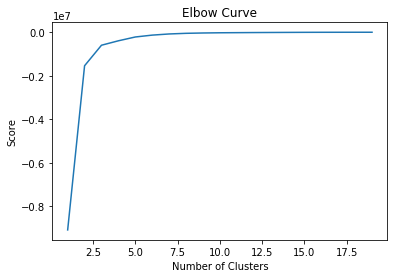

In [18]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()


Using more data is probably counterproductive, but let's try 

In [8]:
dataplus=stats.drop(["label"],axis=1)
data=dataplus
data.head()

,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,98,1403.775442,1868.816327,1.970585e+06,1035.75,1404.5,1883.75,498.0,8170.0,1,1
1,99,1812.662114,2139.282828,3.285744e+06,1094.00,1430.0,2435.50,615.0,9112.0,1,0
2,91,1873.889033,3916.604396,3.511460e+06,2471.00,3067.0,4722.00,1236.0,9972.0,2,8
3,97,1308.893667,1815.742268,1.713203e+06,1035.00,1313.0,2029.00,258.0,6985.0,1,2
4,25,2220.932875,4667.000000,4.932543e+06,3024.00,3943.0,6051.00,2004.0,9803.0,3,74


In [29]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_


print(labels)
print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(accuracy)
print(confusionMatrix)




[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
0.0
[[ 0  9]
 [18  0]]


We have 85% of success ratio, good percentage but less than before, so let's stick with missing packets, hops and std

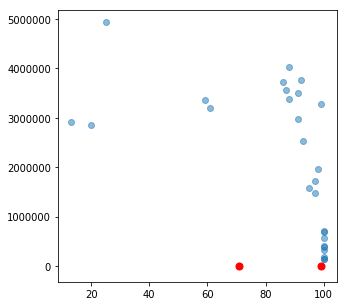

In [10]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)


plt.scatter(data['count'], data['var'], alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.show()

In [11]:
#https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/
#df=np.array(X,Y)




In [12]:


X = dataplus.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

,x1,x2,labels
0,-1.906469e+05,1109.374349,BH1
1,1.124512e+06,1558.013436,BH1
2,1.350229e+06,-95.831043,BH1
3,-4.480298e+05,1021.728477,BH1
4,2.771312e+06,-69.901685,BH1


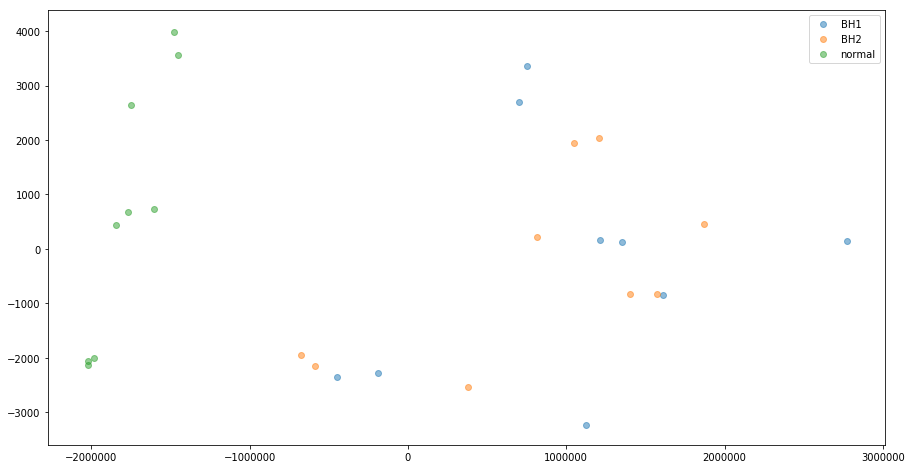

In [13]:
X = data
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    #plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()

Experiment with 3 clusters trying also to find the black Hole node, 0.74% of probability finding a black hole in the network

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataplus)
labels = kmeans.predict(dataplus)
centroids = kmeans.cluster_centers_


print(labels)
print(correction2)


# Performance Metrics
accuracy=sm.accuracy_score(correction2, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction2, labels)

print(accuracy)
print(confusionMatrix)

[0 2 2 0 2 2 2 2 2 0 0 2 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1]
[0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 1 1 1 1 1 1 1]
0.5925925925925926
[[ 5  0 11]
 [ 0  9  0]
 [ 0  0  2]]


In [15]:
for i in range(len(labels)):
    if labels[i]==2:
        labels[i]=0
       
    if correction2[i]==2:
        correction2[i]=0
print(labels)
print(correction2)        
# Performance Metrics
accuracy=sm.accuracy_score(correction2, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction2, labels)

print(accuracy)
print(confusionMatrix)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
1.0
[[18  0]
 [ 0  9]]


## Experiment with Windows 

using windows we can have virtually more data to work with



In [61]:

dataList=coojaJsonImporter("../cooja-9nodes/traces")
data=[]
cases=[
      "BH1",
        "BH2",
    "normal"
      ]

for nodeList in dataList:
    data.append(createNodes(nodeList))
pings=getPings(data)    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
    "50%":[],
    "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing":[]
   #"rtt/pkt":[]
}

window=25
for i in range(len(data)):
    
    for j in range(len(data[i])):
        #n=len(data[i][j].pkts["rtt"])
        n=pings[i]
        #print(n)
        for z in range(0,n,int(1)):
            #print(z)
            
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["pkt"]<z+window) & (node["pkt"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)

stats=pd.DataFrame(d) 

print(stats.head())
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
print(stats.columns)
data=stats.drop(["label","25%","75%","50%","min","max","mean","var"],axis=1)
data.head()

Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
  label  count          std         mean           var     25%     50%  \
0   BH1     25  1574.069840  1795.880000  2.477696e+06   904.0  1300.0   
1   BH1     25   943.391114  1654.280000  8.899868e+05   976.0  1321.0   
2   BH1     23  1945.442658  2384.043478  3.784747e+06  1024.5  1481.0   
3   BH1     23  2045.025971  2506.695652  4.182131e+06  1161.0  1613.0   
4   BH1     25  1133.389937  1769.600000  1.284573e+06  1190.0  1403.0   

      75%    min     max  hop  missing  
0  2104.0  746.0  8170.0    1        0  
1  2104.0  709.0  3948.0    1        0  
2  2711.5  709.0  7261.0    1        2  
3  3310.5  760.0  7261.0    1        2  
4  1729.0  709.0  5136.0    1        0  
(243, 12)
(231, 12)
Index(['label', 'count', 'std', 'mean', 'var', '25%', '50%', '75%', 'min',
       'max', 'hop', 'missing'],
      dtype='object')


,count,std,hop,missing
0,25,1574.069840,1,0
1,25,943.391114,1,0
2,23,1945.442658,1,2
3,23,2045.025971,1,2
4,25,1133.389937,1,0


In [63]:
stats


,label,count,std,mean,var,25%,50%,75%,min,max,hop,missing
0,BH1,25,1574.069840,1795.880000,2.477696e+06,904.00,1300.0,2104.00,746.0,8170.0,1,0
1,BH1,25,943.391114,1654.280000,8.899868e+05,976.00,1321.0,2104.00,709.0,3948.0,1,0
2,BH1,23,1945.442658,2384.043478,3.784747e+06,1024.50,1481.0,2711.50,709.0,7261.0,1,2
3,BH1,23,2045.025971,2506.695652,4.182131e+06,1161.00,1613.0,3310.50,760.0,7261.0,1,2
4,BH1,25,1133.389937,1769.600000,1.284573e+06,1190.00,1403.0,1729.00,709.0,5136.0,1,0
5,BH1,25,507.900702,1447.960000,2.579631e+05,1233.00,1362.0,1697.00,498.0,3128.0,1,0
6,BH1,25,479.900587,1559.640000,2.303046e+05,1309.00,1495.0,1790.00,498.0,3128.0,1,0
7,BH1,16,660.508059,1528.687500,4.362709e+05,1177.50,1430.0,1804.75,498.0,3430.0,1,9
8,BH1,4,1179.228137,1748.500000,1.390579e+06,993.75,1369.5,2124.25,825.0,3430.0,1,21
9,BH1,24,1784.660435,1701.500000,3.185013e+06,965.00,1161.0,1368.50,762.0,8991.0,1,1


In [66]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

data.columns
correction=[]
#stats=stats.dropna()

col=np.array(stats["label"])

for i in range(len(col)):
    el=col[i]
    if el=="normal":
        correction.append(0)
      
        
    else:
       
        correction.append(1)
        

correction=np.array(correction)
print(len(correction))
print(len(labels))
#print(labels)
#print(correction)

# Performance Metrics
accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(correction)
print(labels)
print(accuracy)
print(confusionMatrix)

231
231
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
0.8138528138528138
[[ 79   2]
 [ 41 109]]


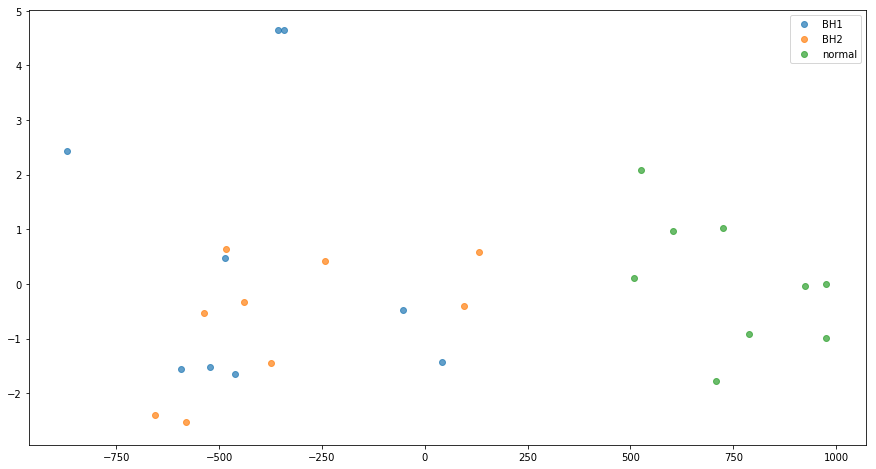

In [19]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()

Success with a big window we have again 100% success rate, let's try with a smaller one

In [19]:
## Experiment with smaller windows

In [20]:
dataList=coojaJsonImporter("../cooja-9nodes/traces/")

data=[]
cases=[
      "BH1",
        "BH2",
    
    "normal"
      ]
"""
Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
"""



BlackHole=[-1,4,5+8,-1]
#cases=["1BH","1BH","Norm"]
for nodeList in dataList:
    data.append(createNodes(nodeList))
#dataList=coojaJsonImporter("../cooja-9nodes/traces/")
#for nodeList in dataList:
#    data.append(createNodes(nodeList))
    
pings=getPings(data)    
d={ "label":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    "25%":  [],
    "50%":[],
    "75%":[],
   "min":[],
   "max":[],
   "hop":[],
   "missing":[]
   #"rtt/pkt":[]
}

for i in range(len(data)):
    
    for j in range(len(data[i])):
        #n=len(data[i][j].pkts["rtt"])
        n=pings[i]
        #print(n)
        #window=n
        window=50
        
        for z in range(0,n,window):
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node[(node["pkt"]<z+window) & (node["pkt"]>=z)]["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            if(nodeWindow.count()<window/2): break
            d["count"].append(nodeWindow.count())
            d["std"].append(nodeWindow.std())
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #print(nodeWindow.describe()["25%"])
            d["25%"].append(nodeWindow.describe()["25%"])
            d["50%"].append(nodeWindow.describe()["50%"])
            d["75%"].append(nodeWindow.describe()["75%"])
            d["min"].append(nodeWindow.describe()["min"])
            d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            
            missing=window-nodeWindow.count()
            d["missing"].append(missing)

            
#Transforming in dataframe            
stats=pd.DataFrame(d)
print(stats.shape)
stats=stats.dropna()
print(stats.shape)
data=stats.drop(["missing","label","25%","75%","50%","min","max","mean","var"],axis=1)
print(data.head())
###Creating correction Array
correction=[]
#stats=stats.dropna()

col=np.array(stats["label"])

for i in range(len(col)):
    el=col[i]
    if el=="normal":
        correction.append(1)
    else:
        correction.append(0)
correction=np.array(correction)
print(len(correction))
print(len(labels))

####Doing kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
print(data.columns)




accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
confusionMatrix=sm.confusion_matrix(correction, labels)

print(correction)
print(labels)
print(accuracy)
print(confusionMatrix)

Importing test_1BH_2018-11-09_12_31_25.json
Importing test_1BH_2018-11-09_14_37_46.json
Importing test_nom_2018-11-09_08_55_11.json
(47, 12)
(47, 12)
   count          std  hop
0     48  1771.238705    1
1     50   910.117928    1
2     49  1942.934293    1
3     50  1694.563007    1
4     41  2068.606934    2
47
3
Index(['count', 'std', 'hop'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
[0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.8936170212765957
[[24  5]
 [ 0 18]]


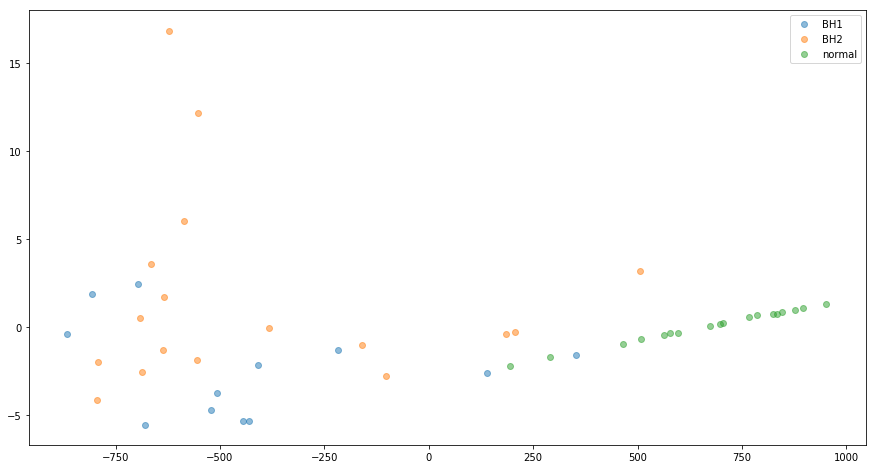

In [21]:
X = data
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()
labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    #plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.5)
    plt.legend()